In [8]:
import pandas as pd

file_path = "C:/Drive D/OneDrive/Dokumen/Data Sales.csv"

df = pd.read_csv(file_path, encoding='windows-1254', delimiter=';')

print(df.head())


         Order ID     Month  Year           City    Segment         Category  \
0  CA-2014-156587     Maret  2014    DKI Jakarta   Consumer        Furniture   
1  CA-2014-156587     Maret  2014     Jawa Barat   Consumer  Office Supplies   
2  CA-2014-152905  Februari  2014         Banten   Consumer  Office Supplies   
3  CA-2014-156587     Maret  2014    Jawa Tengah   Consumer  Office Supplies   
4  CA-2014-157644  Desember  2014  DI Yogyakarta  Corporate       Technology   

  Sub-Category                                       Product Name       Sales  \
0       Chairs         Global Push Button Manager's Chair, Indigo   USD 48,71   
1      Storage            Carina 42"Hx23 3/4"W Media Storage Unit  USD 242,94   
2      Storage                                 Akro Stacking Bins   USD 12,62   
3          Art                                         Newell 330   USD 17,94   
4  Accessories  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   USD 34,77   

   Quantity     Profit  
0      

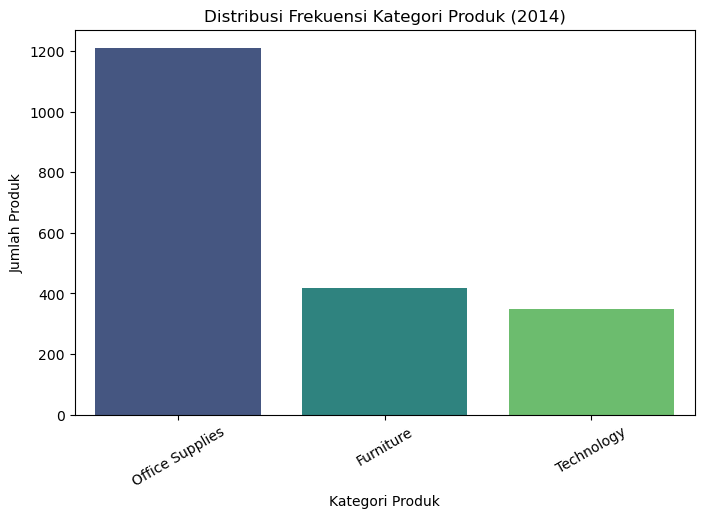

Category
Office Supplies    1210
Furniture           417
Technology          350
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memfilter data untuk tahun 2014
df_2014 = df[df["Year"] == 2014]

# Menghitung distribusi frekuensi kategori produk
category_counts = df_2014["Category"].value_counts()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette="viridis", legend=False)
plt.title("Distribusi Frekuensi Kategori Produk (2014)")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Produk")
plt.xticks(rotation=30)
plt.show()

# Menampilkan data dalam bentuk tabel
print(category_counts)


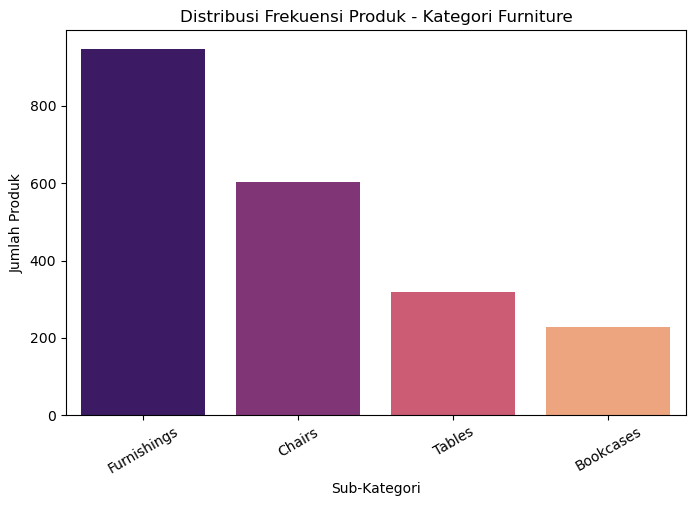

Sub-Category
Furnishings    948
Chairs         604
Tables         319
Bookcases      228
Name: count, dtype: int64


In [10]:
# Memfilter data untuk kategori Furniture
df_furniture = df[df["Category"] == "Furniture"]

# Menghitung distribusi frekuensi sub-kategori dalam Furniture
furniture_counts = df_furniture["Sub-Category"].value_counts()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=furniture_counts.index, y=furniture_counts.values, hue=furniture_counts.index, palette="magma", legend=False)
plt.title("Distribusi Frekuensi Produk - Kategori Furniture")
plt.xlabel("Sub-Kategori")
plt.ylabel("Jumlah Produk")
plt.xticks(rotation=30)
plt.show()

# Menampilkan data dalam bentuk tabel
print(furniture_counts)


In [21]:
import pandas as pd

# Filter kategori "Technology"
df_tech = df[df["Category"] == "Technology"].copy()

# Perbaiki format angka di kolom Sales
df_tech["Sales"] = (
    df_tech["Sales"]
    .str.replace("USD ", "", regex=False)  # Hapus label "USD "
    .str.replace(".", "", regex=False)     # Hapus pemisah ribuan
    .str.replace(",", ".", regex=False)    # Ganti koma dengan titik untuk desimal
    .astype(float)  # Konversi ke float
)

# Mengelompokkan data berdasarkan produk dan menghitung total penjualan
top_tech_product = df_tech.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(1)

# Menampilkan produk dengan penjualan tertinggi
print(top_tech_product)


Product Name
Canon imageCLASS 2200 Advanced Copier    61599.83
Name: Sales, dtype: float64


In [22]:
import pandas as pd

# Filter data untuk Jakarta
df_jakarta = df[df["City"] == "DKI Jakarta"].copy()

# Membersihkan dan mengonversi kolom Sales menjadi float
df_jakarta["Sales"] = (
    df_jakarta["Sales"]
    .astype(str)  # Konversi ke string untuk menghindari error jika ada nilai NaN
    .str.replace("USD ", "", regex=False)  # Hapus label "USD "
    .str.replace(".", "", regex=False)  # Hapus pemisah ribuan
    .str.replace(",", ".", regex=False)  # Ganti koma dengan titik untuk desimal
    .str.strip()  # Hapus spasi ekstra jika ada
)

# Konversi ke float, gunakan errors='coerce' untuk menangani kesalahan
df_jakarta["Sales"] = pd.to_numeric(df_jakarta["Sales"], errors='coerce')

# Menghapus baris yang masih memiliki NaN setelah konversi
df_jakarta = df_jakarta.dropna(subset=["Sales"])

# Mengelompokkan total pembelian per tahun
sales_per_year = df_jakarta.groupby("Year")["Sales"].sum()

# Menampilkan hasil
print(sales_per_year)


Year
2014     87787.13
2015     62475.99
2016     83647.59
2017    114541.59
Name: Sales, dtype: float64


In [23]:
# Memfilter data untuk tahun 2015
df_2015 = df[df["Year"] == 2015]

# Total pembeli tipe Corporate
total_corporate = df_2015[df_2015["Segment"] == "Corporate"].shape[0]

# Total pembeli Corporate yang membeli kategori Office Supplies
corporate_office_supplies = df_2015[(df_2015["Segment"] == "Corporate") & (df_2015["Category"] == "Office Supplies")].shape[0]

# Menghitung peluang
probability = corporate_office_supplies / total_corporate

# Menampilkan hasil
print(f"Peluang pembeli tipe Corporate membeli kategori Office Supplies pada tahun 2015: {probability:.2%}")


Peluang pembeli tipe Corporate membeli kategori Office Supplies pada tahun 2015: 59.08%
